# Extract inflow mean profiles

In [1]:
#!/usr/bin/env python                                                                                                                       

# Add any possible locations of amr-wind-frontend here                                                                                      
amrwindfedirs = ['../',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Important header information                                                                                                              
#import postprolib as pp

# Load the libraries                                                                                                                        
#import postproamrwindsample as ppsample
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import xarray as xr
#import argparse
import pickle

# Make all plots inline 
%matplotlib inline

In [2]:
def loadPickle(picklefname):
    pfile = open(picklefname, 'rb')
    db   = pickle.load(pfile)
    x    = db['x']
    y    = db['y']
    z    = db['z']
    vx   = db['vx']
    vy   = db['vy']
    vz   = db['vz']
    time = db['time']
    pfile.close()
    return x, y, z, vx, vy, vz, time

def avgfield(v, mintime, maxtime):
    avgv = None
    iavg = 0
    for itime, vfield in v.items():
        if (mintime<=itime) and (itime<=maxtime):
            iavg += 1
            if avgv is None:
                avgv = vfield
            else:
                avgv += vfield
    #print(iavg)
    return avgv/float(iavg)

def setfigtextsize(ax, fsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.yaxis.get_offset_text()] + ax.get_xticklabels() + ax.get_yticklabels() ):
        item.set_fontsize(fsize)
        
def getplaneptnormal(X, Y):
    x00=np.array([X[0,0], Y[0,0]])
    x0m1=np.array([X[0,-1], Y[0,-1]])
    ym10=np.array([X[-1,0], Y[-1,0]])
    vec = x0m1 - x00
    normal = [vec[1], -vec[0]]
    normal = normal/np.linalg.norm(normal)
    return x00, normal

def getplanedist(X, Y, targetpt, applysign=True):
    planept, normal = getplaneptnormal(X, Y)
    projpt = np.dot(planept- targetpt, normal)
    dist = np.linalg.norm(projpt)
    if applysign: dist = dist*np.sign(projpt)
    return dist

In [3]:
tavg1 = 300
tavg2 = 1000
kplot = 1
KPlist =  [{'title':'Plane 1', 'kplane':0,
             'noturb':'means/KP_inflow1_mean_noturb.pkl',
             'wturb':'means/KP_inflow1_mean_wturb.pkl'},
            {'title':'Plane 2', 'kplane':1,
             'noturb':'means/KP_inflow1_mean_noturb.pkl',
             'wturb':'means/KP_inflow1_mean_wturb.pkl'},
            {'title':'Plane 3', 'kplane':2,
             'noturb':'means/KP_inflow1_mean_noturb.pkl',
             'wturb':'means/KP_inflow1_mean_wturb.pkl'},
            {'title':'Plane 4', 'kplane':3,
             'noturb':'means/KP_inflow1_mean_noturb.pkl',
             'wturb':'means/KP_inflow1_mean_wturb.pkl'},
            {'title':'Plane 5', 'kplane':4,
             'noturb':'means/KP_inflow1_mean_noturb.pkl',
             'wturb':'means/KP_inflow1_mean_wturb.pkl'},
          ]

CVlist = [{'title':'Breckinridge outflow', 'kplane':1,
           'noturb':'means/BR_ioflow_mean_noturb.pkl',
           'wturb':'means/BR_ioflow_mean_wturb.pkl'},
          {'title':'Chisholm View inflow', 'kplane':0,
            'noturb':'means/CV_ioflow_mean_noturb.pkl',
            'wturb':'means/CV_ioflow_mean_wturb.pkl'},
]

H05pt = np.array([643050.588260, 4025581.533244])

rotorD = 127.0
# Save directory
savedir    = '../../CompareResults/InflowPlanesVel/Unstable/'
savedir    = savedir+'/DATA_Summit_amrwind_bananasrun1/'
saveprefix = 'KP_Unstable_%s_InflowPlane_%0.2fD.dat'

Loading farm Plane 1
-30.1769335303961
Loading farm Plane 2
3.2876333987364306
Loading farm Plane 3
36.752200327872615
Loading farm Plane 4
70.21676725700515
Loading farm Plane 5
103.68133418613775


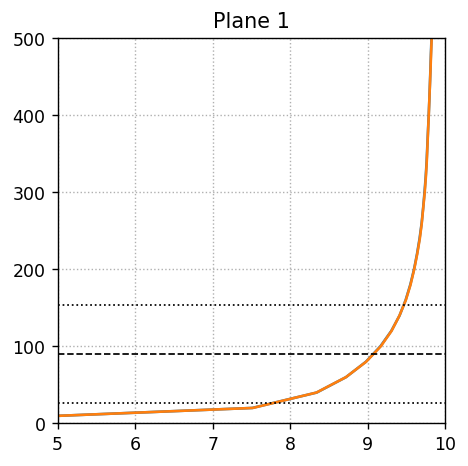

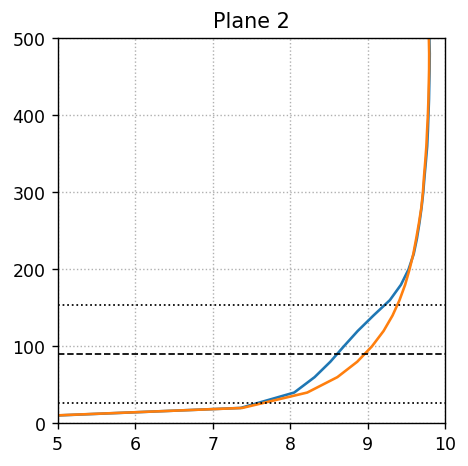

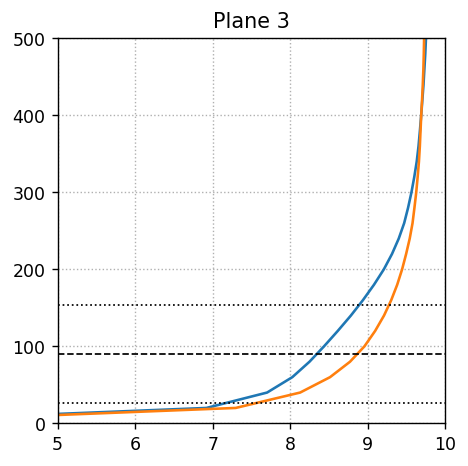

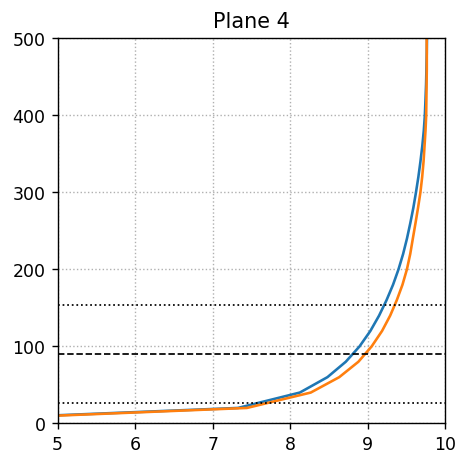

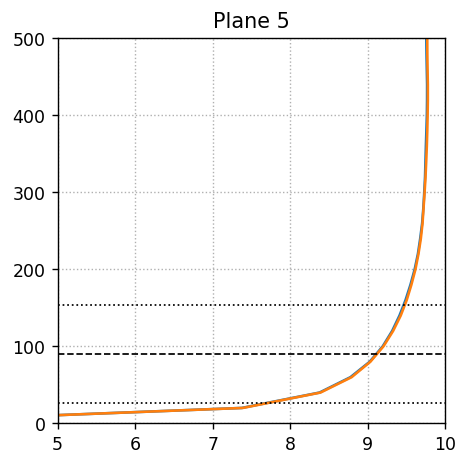

In [4]:
Nplots=len(KPlist)
#fig, axs = plt.subplots(Nplots,1,figsize=(8,1.6*Nplots), dpi=125, sharey=True)

for iplane, farm in enumerate(KPlist):
    fig, axs = plt.subplots(1,1,figsize=(4,4), dpi=125, sharey=True)
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    vz_avg_wt = avgfield(vz, tavg1, tavg2)
    
    x, y, z, vx, vy, vz, time = loadPickle(farm['noturb'])
    vx_avg_nt = avgfield(vx, tavg1, tavg2)
    vy_avg_nt = avgfield(vy, tavg1, tavg2)
    vz_avg_nt = avgfield(vz, tavg1, tavg2)
    
    kplane=farm['kplane']
    #print(getplaneptnormal(x[kplane, :, :], y[kplane, :, :]))
    distD = getplanedist(x[kplane, :, :], y[kplane, :, :], H05pt)/rotorD
    print(distD)
    
    vh_wt = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)[kplane,:,:]
    vh_nt = np.sqrt(vx_avg_nt**2 + vy_avg_nt**2)[kplane,:,:]
    
    x1, x2 = 635000, 650000
    #x1, x2 = 640000, 650000
    #x1, x2 = 0.0, 1.0E10
    #x1, x2 = 620000, 635000
    xfilter = (x1<=x[kplane,0,:]) & (x[kplane,0,:] <=x2)
    
    # Average the velocities
    vx_nt_prof = np.mean(vx_avg_nt[kplane, :, xfilter], axis=0)
    vy_nt_prof = np.mean(vy_avg_nt[kplane, :, xfilter], axis=0)
    vz_nt_prof = np.mean(vz_avg_nt[kplane, :, xfilter], axis=0)
    vx_wt_prof = np.mean(vx_avg_wt[kplane, :, xfilter], axis=0)
    vy_wt_prof = np.mean(vy_avg_wt[kplane, :, xfilter], axis=0)
    vz_wt_prof = np.mean(vz_avg_wt[kplane, :, xfilter], axis=0)
    zvec = z[kplane,:,0]
    #print(vx_avg_nt[kplane, :, xfilter].shape)
    # Create the save files
    save_dat_nt = np.vstack((zvec, vx_nt_prof,  vy_nt_prof,  vz_nt_prof)).transpose()
    save_dat_wt = np.vstack((zvec, vx_wt_prof,  vy_wt_prof,  vz_wt_prof)).transpose()
    
    # Write the path
    try:
        os.makedirs(savedir)
    except:
        pass
    filename_nt = savedir+'/'+saveprefix%('precursor', distD)
    filename_wt = savedir+'/'+saveprefix%('turbine', distD)
    np.savetxt(filename_nt, save_dat_nt)
    np.savetxt(filename_wt, save_dat_wt)
    
    # Average the Vh profiles
    vh_wt_filter = vh_wt[:, xfilter]
    vh_nt_filter = vh_nt[:, xfilter]
    vh_wt_prof = np.mean(vh_wt_filter, axis=1)
    vh_nt_prof = np.mean(vh_nt_filter, axis=1)
    ax = axs
    #ax.plot(vh_wt_prof, zvec)
    #ax.plot(vh_nt_prof, zvec)
    ax.plot(np.sqrt(vx_wt_prof**2 + vy_wt_prof**2), zvec)
    ax.plot(np.sqrt(vx_nt_prof**2 + vy_nt_prof**2), zvec)
    ax.set_ylim([0, 500])
    ax.set_xlim([5, 10])
    
    # Plot the rotor lines
    ax.axhline(90+0.5*127, ls=':', lw=1.0, color='k')
    ax.axhline(90,         ls='--',lw=1.0, color='k')
    ax.axhline(90-0.5*127, ls=':', lw=1.0, color='k')
    
    ax.grid(ls=':')
    ax.set_title(farm['title'])

Loading farm Plane 1
Loading farm Plane 2
Loading farm Plane 3
Loading farm Plane 4
Loading farm Plane 5


Text(0.5, 0.925, 'King Plains inflow/outflow planes: avg. horizontal velocity difference')

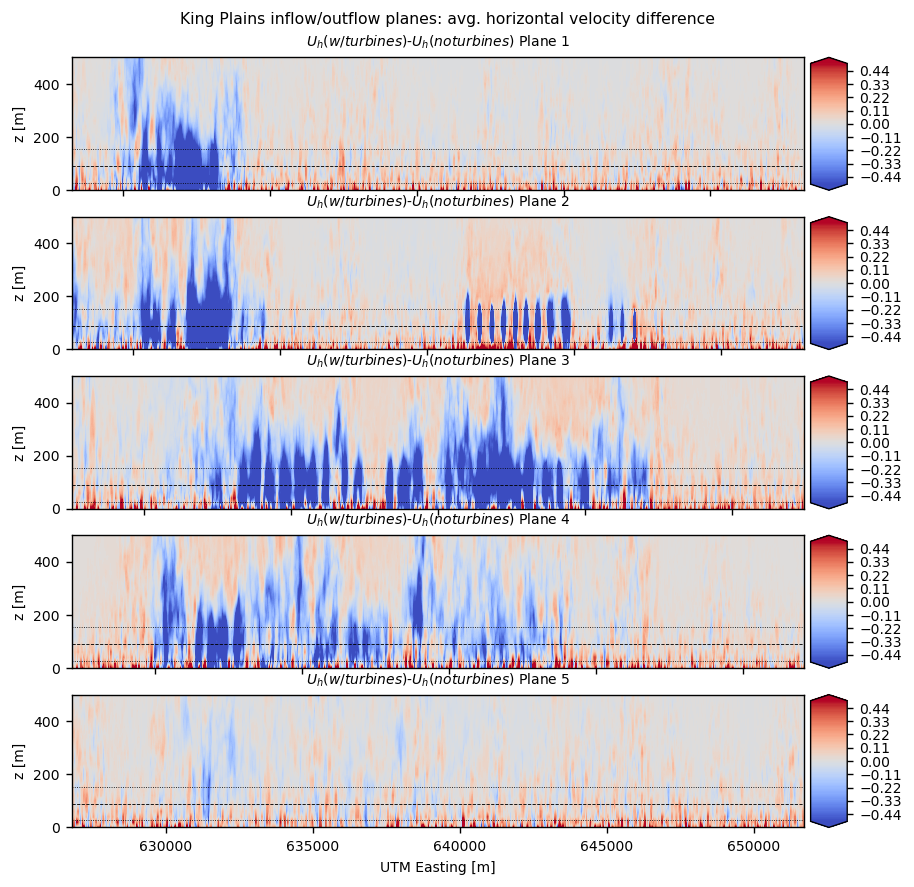

In [5]:
Nplots=len(KPlist)
fig, axs = plt.subplots(Nplots,1,figsize=(8,1.6*Nplots), dpi=125, sharey=True)

for iplane, farm in enumerate(KPlist):
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    vz_avg_wt = avgfield(vz, tavg1, tavg2)
    
    x, y, z, vx, vy, vz, time = loadPickle(farm['noturb'])
    vx_avg_nt = avgfield(vx, tavg1, tavg2)
    vy_avg_nt = avgfield(vy, tavg1, tavg2)
    vz_avg_nt = avgfield(vz, tavg1, tavg2)
    
    kplane=farm['kplane']
        
    # plot the with turbine mean flow case
    ax = axs[iplane]
    vh_wt = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)
    vh_nt = np.sqrt(vx_avg_nt**2 + vy_avg_nt**2)
    #plotvar = vz_avg_wt[kplane,:,:]-vz_avg_nt[kplane,:,:];  meanlevels = np.linspace(-0.25,0.25,101)
    #plotvar = vh_wt[kplane,:,:]/vh_nt[kplane,:,:];  meanlevels = np.linspace(0.95,1.05,101)
    plotvar = vh_wt[kplane,:,:]-vh_nt[kplane,:,:];  meanlevels = np.linspace(-0.5,0.5,101)
    c=ax.contourf(x[kplane,:,:], z[kplane,:,:], plotvar, levels=meanlevels, cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    ax.set_title('$U_h(w/turbines)$-$U_h(no turbines)$ '+farm['title'])
    cbar.ax.tick_params(labelsize=8)
    #ax.set_aspect('equal')
    if iplane<Nplots-1: ax.set(xticklabels=[]) #ax.get_xaxis().set_ticks([])
    ax.set_ylabel('z [m]')
    setfigtextsize(ax, 8)
    # Plot the rotor lines
    ax.axhline(90+0.5*127, ls=':', lw=0.5, color='k')
    ax.axhline(90,        ls='--', lw=0.5, color='k')
    ax.axhline(90-0.5*127, ls=':', lw=0.5, color='k')

    
axs[-1].set_xlabel('UTM Easting [m]')
fig.suptitle('King Plains inflow/outflow planes: avg. horizontal velocity difference', y=0.925, fontsize=9)

Loading farm Breckinridge outflow
Loading farm Chisholm View inflow


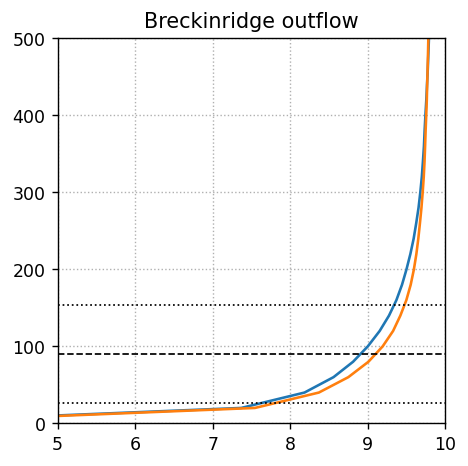

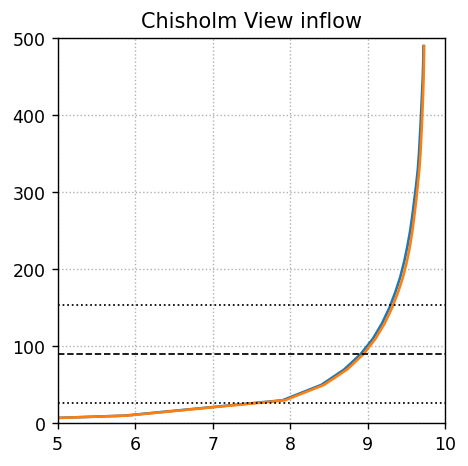

In [6]:
Nplots=len(KPlist)
#fig, axs = plt.subplots(Nplots,1,figsize=(8,1.6*Nplots), dpi=125, sharey=True)

for iplane, farm in enumerate(CVlist):
    fig, axs = plt.subplots(1,1,figsize=(4,4), dpi=125, sharey=True)
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    vz_avg_wt = avgfield(vz, tavg1, tavg2)
    
    x, y, z, vx, vy, vz, time = loadPickle(farm['noturb'])
    vx_avg_nt = avgfield(vx, tavg1, tavg2)
    vy_avg_nt = avgfield(vy, tavg1, tavg2)
    vz_avg_nt = avgfield(vz, tavg1, tavg2)
    
    kplane=farm['kplane']
    
    vh_wt = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)[kplane,:,:]
    vh_nt = np.sqrt(vx_avg_nt**2 + vy_avg_nt**2)[kplane,:,:]
    
    #x1, x2 = 635000, 650000
    x1, x2 = 0.0, 1.0E10
    xfilter = (x1<=x[kplane,0,:]) & (x[kplane,0,:] <=x2)
    vh_wt_filter = vh_wt[:, xfilter]
    vh_nt_filter = vh_nt[:, xfilter]
    
    zvec = z[kplane,:,0]
    vh_wt_prof = np.mean(vh_wt_filter, axis=1)
    vh_nt_prof = np.mean(vh_nt_filter, axis=1)
    ax = axs
    ax.plot(vh_wt_prof, zvec)
    ax.plot(vh_nt_prof, zvec)
    ax.set_ylim([0, 500])
    ax.set_xlim([5, 10])
    
    # Plot the rotor lines
    ax.axhline(90+0.5*127, ls=':', lw=1.0, color='k')
    ax.axhline(90,         ls='--',lw=1.0, color='k')
    ax.axhline(90-0.5*127, ls=':', lw=1.0, color='k')
    
    ax.grid(ls=':')
    ax.set_title(farm['title'])

Loading farm Breckinridge outflow
Loading farm Chisholm View inflow


Text(0.5, 0, 'UTM Easting [m]')

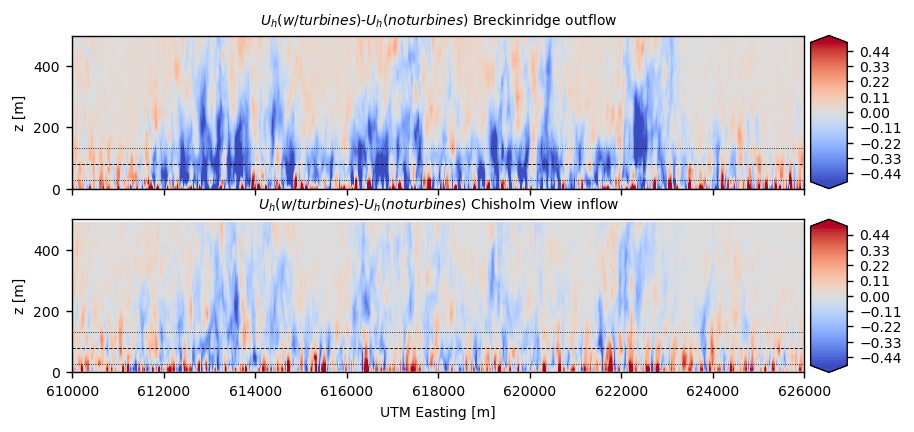

In [7]:
Nplots=len(CVlist)
fig, axs = plt.subplots(Nplots,1,figsize=(8,1.75*Nplots), dpi=125, sharey=True)

for iplane, farm in enumerate(CVlist):
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    vz_avg_wt = avgfield(vz, tavg1, tavg2)
    
    x, y, z, vx, vy, vz, time = loadPickle(farm['noturb'])
    vx_avg_nt = avgfield(vx, tavg1, tavg2)
    vy_avg_nt = avgfield(vy, tavg1, tavg2)
    vz_avg_nt = avgfield(vz, tavg1, tavg2)
    
    kplane=farm['kplane']
        
    # plot the with turbine mean flow case
    ax = axs[iplane]
    vh_wt = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)
    vh_nt = np.sqrt(vx_avg_nt**2 + vy_avg_nt**2)
    #plotvar = vz_avg_wt[kplane,:,:]-vz_avg_nt[kplane,:,:];  meanlevels = np.linspace(-0.25,0.25,101)
    #plotvar = vh_wt[kplane,:,:]/vh_nt[kplane,:,:];  meanlevels = np.linspace(0.95,1.05,101)
    plotvar = vh_wt[kplane,:,:]-vh_nt[kplane,:,:];  meanlevels = np.linspace(-0.5,0.5,101)
    c=ax.contourf(x[kplane,:,:], z[kplane,:,:], plotvar, levels=meanlevels, cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    ax.set_title('$U_h(w/turbines)$-$U_h(no turbines)$ '+farm['title'])
    cbar.ax.tick_params(labelsize=8)
    #ax.set_aspect('equal')
    if iplane<Nplots-1: ax.set(xticklabels=[]) #ax.get_xaxis().set_ticks([])
    ax.set_ylabel('z [m]')
    ax.set_xlim([610000, 626000])
    ax.set_ylim([0, 500])
    setfigtextsize(ax, 8)

    # Plot the rotor lines
    ax.axhline(80+0.5*103, ls=':', lw=0.5, color='k')
    ax.axhline(80,        ls='--', lw=0.5, color='k')
    ax.axhline(80-0.5*103, ls=':', lw=0.5, color='k')
    
axs[-1].set_xlabel('UTM Easting [m]')